In [1]:
from sympy import *
from sympy.physics.continuum_mechanics import Beam
from numpy import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
R0,RL,P,x,s = symbols('R0 R_L P x s')
L,E,I = symbols('L E I ', positive = True)

In [3]:
viga = Beam(10,E,I)

In [4]:
viga.apply_load(196.2,1,-1)
viga.apply_load(490.5,4,-1)
viga.apply_load(392.4,8,-1)

In [5]:
viga.apply_support(0,type='pin')
viga.apply_support(10,type='roller')

C:\Users\abner\anaconda3\lib\site-packages\sympy\plotting\plot.py:1376: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(**a)


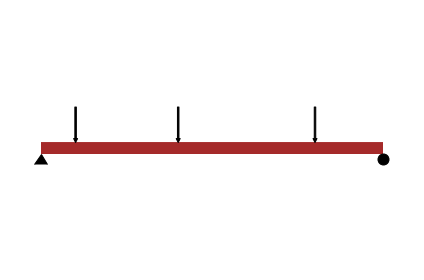

In [6]:
viga.draw().show()

In [7]:
viga.load

R_0*SingularityFunction(x, 0, -1) + R_10*SingularityFunction(x, 10, -1) + 196.2*SingularityFunction(x, 1, -1) + 490.5*SingularityFunction(x, 4, -1) + 392.4*SingularityFunction(x, 8, -1)

In [8]:
r0,r10 = symbols('R_0 R_10')

In [9]:
viga.solve_for_reaction_loads(r0,r10)

In [10]:
viga.reaction_loads[r0]

-549.360000000000

In [11]:
viga.reaction_loads[r10]

-529.740000000000

In [12]:
viga.load

-549.36*SingularityFunction(x, 0, -1) + 196.2*SingularityFunction(x, 1, -1) + 490.5*SingularityFunction(x, 4, -1) + 392.4*SingularityFunction(x, 8, -1) - 529.74*SingularityFunction(x, 10, -1)

In [13]:
viga.shear_force()

549.36*SingularityFunction(x, 0, 0) - 196.2*SingularityFunction(x, 1, 0) - 490.5*SingularityFunction(x, 4, 0) - 392.4*SingularityFunction(x, 8, 0) + 529.74*SingularityFunction(x, 10, 0)

In [14]:
viga.bending_moment()

549.36*SingularityFunction(x, 0, 1) - 196.2*SingularityFunction(x, 1, 1) - 490.5*SingularityFunction(x, 4, 1) - 392.4*SingularityFunction(x, 8, 1) + 529.74*SingularityFunction(x, 10, 1)

In [15]:
viga.slope()

(-274.68*SingularityFunction(x, 0, 2) + 98.1*SingularityFunction(x, 1, 2) + 245.25*SingularityFunction(x, 4, 2) + 196.2*SingularityFunction(x, 8, 2) - 264.87*SingularityFunction(x, 10, 2) + 4954.05)/(E*I)

In [16]:
viga.deflection()

(4954.05*x - 91.56*SingularityFunction(x, 0, 3) + 32.7*SingularityFunction(x, 1, 3) + 81.75*SingularityFunction(x, 4, 3) + 65.4*SingularityFunction(x, 8, 3) - 88.29*SingularityFunction(x, 10, 3))/(E*I)

In [17]:
dic = {E:2.07*10**11, I: 4.9*10**(-6)}

In [18]:
dfl1 = viga.deflection().subs('x',1)
w1 = dfl1.subs(dic)
w1

0.00479393670511683

In [19]:
dfl2 = viga.deflection().subs('x',4)
w2 = dfl2.subs(dic)
w2

0.0146300502809820

In [20]:
dfl3 = viga.deflection().subs('x',8)
w3 = dfl3.subs(dic)
w3

0.00907204968944100

In [21]:
om,d1,d2,d3,g, m1, m2, m3 = symbols('omega delta_1 delta_2 delta_3 g m_1 m_2 m_3')

In [22]:
#d1 = dfl1
#d2 = dfl2
#d3 = dfl3

In [23]:
om = (g*((m1*d1)+(m2*d2)+(m3*d3))/((m1*(d1**2))+(m2*(d2**2))+(m3*(d3**2))))**0.5
om

(g*(delta_1*m_1 + delta_2*m_2 + delta_3*m_3)/(delta_1**2*m_1 + delta_2**2*m_2 + delta_3**2*m_3))**0.5

In [24]:
dic1 = {g:9.81,m1:20,m2:50,m3:40,d1:w1,d2:w2,d3:w3}

In [25]:
om.subs(dic1)

28.4228365939921